# FACIAL EMOTIONS CLASSIFICATION

#### Dominique Del Valle
#### Claudio Macher

### IMPORTS

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os

### DATASET PATH

In [20]:
train_path = 'emotion_images/train'
test_path = 'emotion_images/test'
validation_path = 'emotion_images/validation'
image_categories = os.listdir('emotion_images/train')

### PLOT CATEGORIES

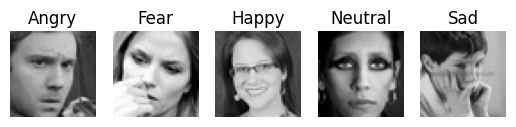

In [21]:
def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(10, 10))
    
classes = []

for i, cat in enumerate(image_categories):
    classes.append(cat)

    # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0

    # Create Subplot and plot the images
    plt.subplot(2, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()

In [22]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   shear_range=0.2,
                                   rescale=1./255,
                                   zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    seed=42,
    class_mode="categorical",
    classes=classes)


test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    seed=42,
    shuffle=False,
    batch_size=32,
    class_mode="categorical",
    classes=classes)


val_set = val_datagen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    seed=42,
    shuffle=False,
    batch_size=32,
    class_mode="categorical",
    classes=classes)


Found 23990 images belonging to 5 classes.
Found 182 images belonging to 5 classes.
Found 4230 images belonging to 5 classes.


In [23]:
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras
from keras import Sequential
from keras.layers import *
from sklearn.metrics import confusion_matrix, classification_report 

### RESNET-50

In [26]:
resnet = ResNet50(include_top=False,
                  weights='imagenet',
                  input_shape=(224, 224, 3))
for layer in resnet.layers:
    layer.trainable = False

model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 5)                 501765    
                                                                 
Total params: 24,089,477
Trainable params: 501,765
Non-trainable params: 23,587,712
_________________________________________________________________


In [27]:
resnet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
750/750 [==============================] - 1761s 2s/step - loss: 10.3857 - accuracy: 0.2235 - val_loss: 5.0259 - val_accuracy: 0.2087
Epoch 2/5
750/750 [==============================] - 1735s 2s/step - loss: 8.3091 - accuracy: 0.2520 - val_loss: 7.4312 - val_accuracy: 0.1908
Epoch 3/5
226/750 [========>.....................] - ETA: 17:08 - loss: 9.5963 - accuracy: 0.3028

KeyboardInterrupt: 

In [ ]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')
plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')
